## Data set with performance data about a number of automobiles.
## Habtom Woldu 
## Date 01 Aug 2024

mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name

18,8,307,130,3504,12,70,1,chevrolet chevelle malibu

15,8,350,165,3693,11.5,70,1,buick skylark 320

18,8,318,150,3436,11,70,1,plymouth satellite

16,8,304,150,3433,12,70,1,amc rebel sst

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   
5  15.0          8         429.0        198    4341          10.0          70   
6  14.0   

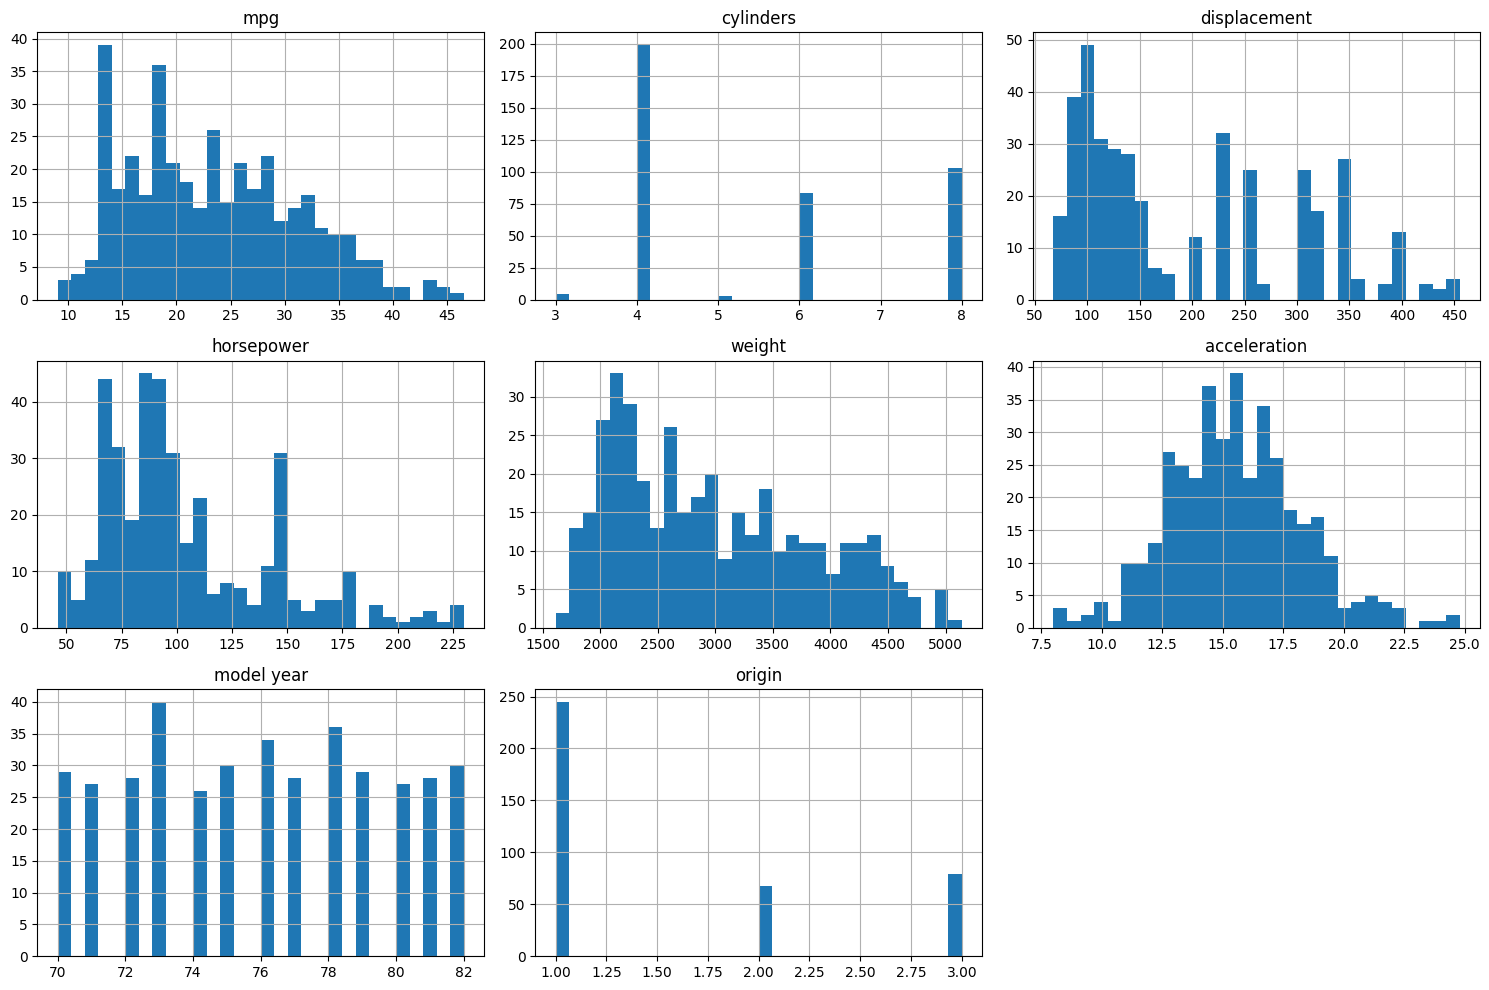

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   
5  15.0          8         429.0       198.0    4341          10.0   
6  14.0          8         454.0       220.0    4354           9.0   
7  14.0          8         440.0       215.0    4312           8.5   
8  14.0          8         455.0       225.0    4425          10.0   
9  15.0          8         390.0       190.0    3850           8.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1    

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Check the first few lines of the file to understand the delimiter
with open("auto-mpg.csv", "r") as file:
    for i in range(5):
        print(file.readline())
auto_mpg = pd.read_csv("auto-mpg.csv", sep=",")
print(auto_mpg.columns)
print()

# Display the first 10 rows
print(auto_mpg.head(n=10))
print()

# Display the last five rows o
print(auto_mpg.tail(n=5))
print()

# Display information about the dataset
print(auto_mpg.info())
print()

# Convert relevant columns to numeric types, if necessary
columns_to_convert = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Check if columns exist and convert them to numeric types
for column in columns_to_convert:
    if column in auto_mpg.columns:
        auto_mpg[column] = pd.to_numeric(auto_mpg[column], errors='coerce')
    else:
        print(f"Warning: Column '{column}' does not exist in the dataset.")

# Drop rows with NaN values if any columns couldn't be converted
auto_mpg.dropna(inplace=True)

# Plot histograms for each numeric column in the dataset
auto_mpg.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Display the first few rows of the dataset again
print(auto_mpg.head(n=10))


##  In Scikit learn train a regression model on the autompg data set.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Check the first few lines of the file to understand the delimiter
with open("auto-mpg.csv", "r") as file:
    for i in range(5):
        print(file.readline())
auto_mpg = pd.read_csv("auto-mpg.csv", sep=",")
print(auto_mpg.columns)
print()

# Display the first 10 rows
print(auto_mpg.head(n=10))
print()

# Display the last five rows o
print(auto_mpg.tail(n=5))
print()

# Display information about the dataset
print(auto_mpg.info())
print()

# Convert relevant columns to numeric types, if necessary
columns_to_convert = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Check if columns exist and convert them to numeric types
for column in columns_to_convert:
    if column in auto_mpg.columns:
        auto_mpg[column] = pd.to_numeric(auto_mpg[column], errors='coerce')
    else:
        print(f"Warning: Column '{column}' does not exist in the dataset.")

# Drop rows with NaN values if any columns couldn't be converted
auto_mpg.dropna(inplace=True)



mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name

18,8,307,130,3504,12,70,1,chevrolet chevelle malibu

15,8,350,165,3693,11.5,70,1,buick skylark 320

18,8,318,150,3436,11,70,1,plymouth satellite

16,8,304,150,3433,12,70,1,amc rebel sst

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   
5  15.0          8         429.0        198    4341          10.0          70   
6  14.0   

In [20]:
from sklearn.model_selection import train_test_split

# Select Features and Target
X = auto_mpg[['weight', 'horsepower']]
y = auto_mpg['mpg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)



LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 17.79177611283814
R-squared: 0.6514190280854428
Coefficients: [-0.00587153 -0.05214672]
Intercept: 46.58674143899789


## Create  pipelined models on the autompg data set with the same two features from before and with mpg as the target

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Check the first few lines of the file to understand the delimiter
with open("auto-mpg.csv", "r") as file:
    for i in range(5):
        print(file.readline())

# Read in the dataset
auto_mpg = pd.read_csv("auto-mpg.csv", sep=",")

# Display the column names
print(auto_mpg.columns)
print()

# Display the first 10 rows
print(auto_mpg.head(n=10))
print()

# Display the last five rows
print(auto_mpg.tail(n=5))
print()

# Display information about the dataset
print(auto_mpg.info())
print()

# Convert relevant columns to numeric types, if necessary
columns_to_convert = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Check if columns exist and convert them to numeric types
for column in columns_to_convert:
    if column in auto_mpg.columns:
        auto_mpg[column] = pd.to_numeric(auto_mpg[column], errors='coerce')
    else:
        print(f"Warning: Column '{column}' does not exist in the dataset.")

# Drop rows with NaN values if any columns couldn't be converted
auto_mpg.dropna(inplace=True)

# Select Features and Target
X = auto_mpg[['weight', 'horsepower']]
y = auto_mpg['mpg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline 1
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train pipeline 1
pipeline1.fit(X_train, y_train)

# Pipeline 2
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train pipeline 2
pipeline2.fit(X_train, y_train)

# Evaluate Pipeline 1
y_pred1 = pipeline1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
r21 = r2_score(y_test, y_pred1)

print(f"Pipeline 1 - Mean Squared Error: {mse1}")
print(f"Pipeline 1 - R-squared: {r21}")

# Evaluate Pipeline 2
y_pred2 = pipeline2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

print(f"Pipeline 2 - Mean Squared Error: {mse2}")
print(f"Pipeline 2 - R-squared: {r22}")


mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name

18,8,307,130,3504,12,70,1,chevrolet chevelle malibu

15,8,350,165,3693,11.5,70,1,buick skylark 320

18,8,318,150,3436,11,70,1,plymouth satellite

16,8,304,150,3433,12,70,1,amc rebel sst

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   
5  15.0          8         429.0        198    4341          10.0          70   
6  14.0   

In [27]:
print(f"Pipeline 1 - Mean Squared Error: {mse1}")
print(f"Pipeline 1 - R-squared: {r21}")


Pipeline 1 - Mean Squared Error: 17.79177611283815
Pipeline 1 - R-squared: 0.6514190280854426


In [28]:
print(f"Pipeline 2 - Mean Squared Error: {mse2}")
print(f"Pipeline 2 - R-squared: {r22}")


Pipeline 2 - Mean Squared Error: 15.744655077557818
Pipeline 2 - R-squared: 0.6915267405239913
